<a href="https://colab.research.google.com/github/Jenesha20/GenAI_Self_Learn/blob/main/langgraph_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q langgraph langchain langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [ ]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, Optional


In [ ]:
class GraphState(TypedDict):
    user_input: str
    documents: Optional[str]
    is_valid: Optional[bool]
    answer: Optional[str]

In [ ]:
def ingest_node(state: GraphState):
    print("Ingesting document...")

    # simulate ingestion
    fake_doc = "LangGraph is a framework for building stateful AI workflows."

    return {
        "documents": fake_doc
    }


In [ ]:
def confirm_node(state: GraphState):
    print("Confirming document validity...")

    docs = state.get("documents", None)

    return {
        "is_valid": docs is not None and len(docs) > 0
    }


In [ ]:
def respond_node(state: GraphState):
    print("Generating response...")

    user_q = state["user_input"]
    docs = state["documents"]

    response = f"Based on the document, the answer to '{user_q}' is:\n\n{docs}"

    return {
        "answer": response
    }


In [ ]:
graph = StateGraph(GraphState)

graph.add_node("ingest", ingest_node)
graph.add_node("confirm", confirm_node)
graph.add_node("respond", respond_node)

In [ ]:
graph.set_entry_point("ingest")
graph.add_edge("ingest", "confirm")
graph.add_edge("confirm", "respond")
graph.add_edge("respond", END)


In [ ]:
app = graph.compile()


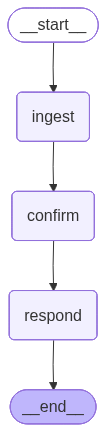

In [ ]:
from IPython.display import Image, display

display(
    Image(
        app.get_graph().draw_mermaid_png()
    )
)

In [ ]:
initial_state = {
    "user_input": "What is LangGraph?",
    "documents": None,
    "is_valid": None,
    "answer": None
}

result = app.invoke(initial_state)

print("\nFINAL OUTPUT👇\n")
print(result["answer"])


Ingesting document...
Confirming document validity...
💬 Generating response...

FINAL OUTPUT👇

Based on the document, the answer to 'What is LangGraph?' is:

LangGraph is a framework for building stateful AI workflows.
